# TASK 2

# Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.


In [2]:
#Importing necesary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the data
df = pd.read_csv('train.csv')

In [4]:
# Checking data from top
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Checking data from bottom
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# Some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Description of data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Shape of dataset
df.shape

(891, 12)

In [10]:
#Listing Columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
#Missing Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Cleaning

In [12]:
#Dropping Cbin column(Large no. of missing values)
df.drop(columns=['Cabin'],inplace=True)

In [13]:
# Filling mising values
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [15]:
a=df['Embarked'].value_counts()
a

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
# filling with most appeared value
df['Embarked'].fillna('S', inplace=True)

# Data Analysis 
# Exploring the relationships between variables and identifying patterns and trends in the data

Out of 891 62 people died in the accident


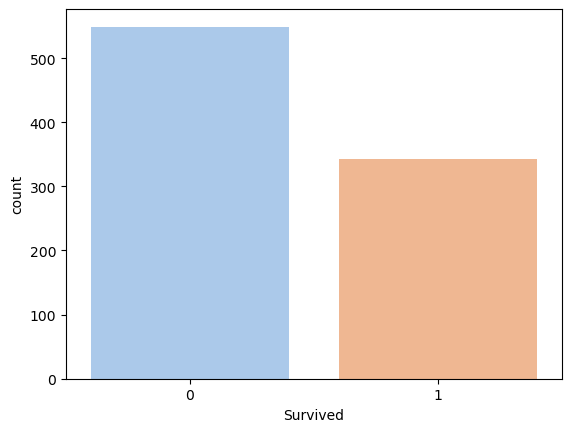

In [27]:
#countplot of subrvived vs not  survived
sns.countplot(x='Survived',data=df,palette="pastel")
death_percent=round((df['Survived'].value_counts().values[0]/891)*100)

print("Out of 891 {} people died in the accident".format(death_percent))

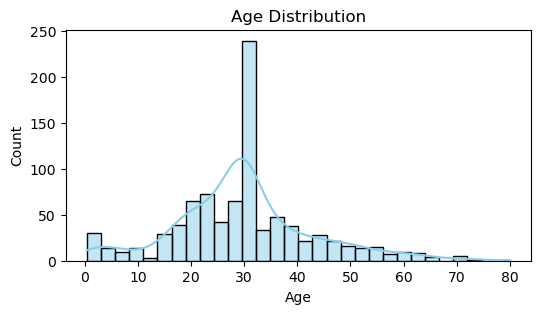

In [33]:
# Age Distribution
plt.figure(figsize=(6,3))
sns.histplot(df["Age"],kde=True,color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()



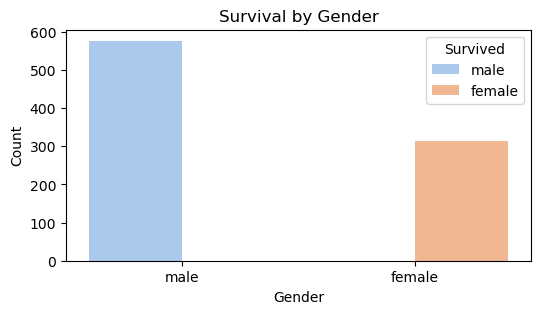

Its clear that more males survived the accident


In [40]:
# Survival by Gender
plt.figure(figsize=(6,3))
sns.countplot(data=df,x="Sex",hue="Sex",palette="pastel")
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived",loc="upper right")
plt.show()
print("Its clear that more males survived the accident")

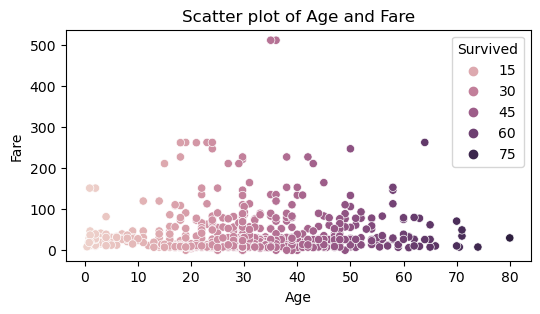

In [43]:
# Age vs Fare
plt.figure(figsize=(6,3))
sns.scatterplot(data=df,x="Age",y="Fare", hue="Age")
plt.title("Scatter plot of Age and Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.show()

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


<Axes: xlabel='Pclass', ylabel='count'>

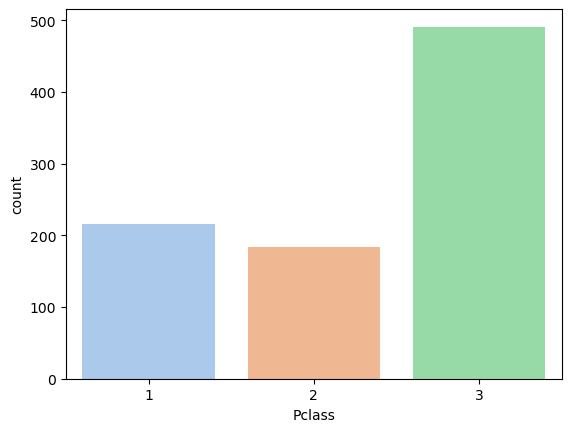

In [45]:
# countplot of various Pclass
print((df['Pclass'].value_counts()/891)*100)
sns.countplot(x='Pclass',data=df,palette="pastel")

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<Axes: xlabel='SibSp', ylabel='count'>

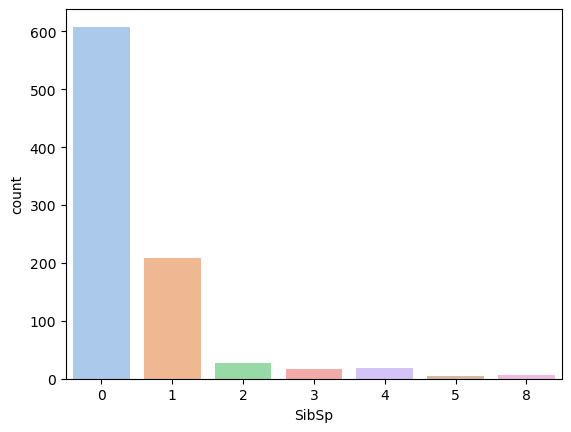

In [46]:
print(df['SibSp'].value_counts())
sns.countplot(x='SibSp',data=df,palette="pastel")

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


<Axes: xlabel='Embarked', ylabel='count'>

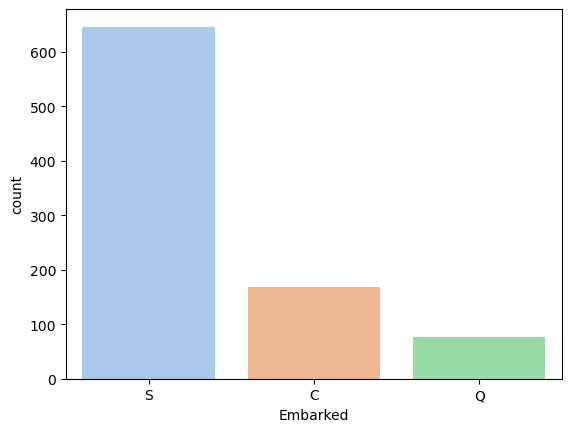

In [47]:
print((df['Embarked'].value_counts()/891)*100)
sns.countplot(x='Embarked',data=df,palette="pastel")

<Axes: >

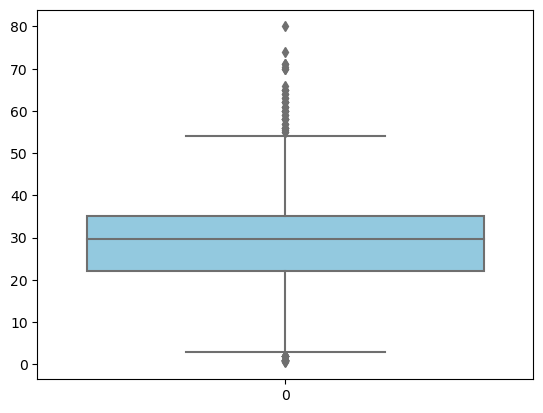

In [53]:
# Plotting boxplot of age and fare
sns.boxplot(df['Age'],color="skyblue")


<Axes: >

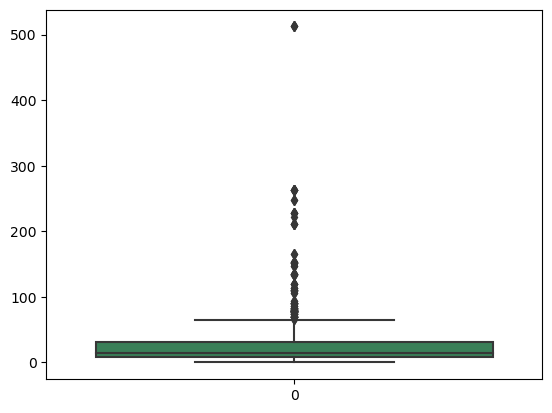

In [52]:
sns.boxplot(df['Fare'],color='seagreen')

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


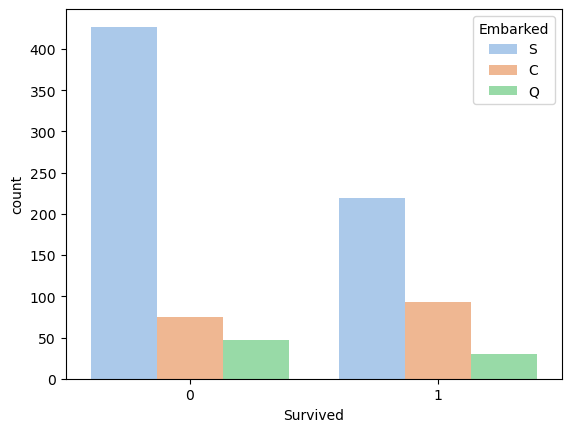

In [57]:
# Survival with Embarked

sns.countplot(x="Survived",data=df, hue=df['Embarked'],palette="pastel")

pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

# Data Modelling

In [63]:
df.drop(['Name','Sex','Ticket'],axis=1,inplace=True)

In [69]:
x=df[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Survived']]
y=df['Embarked']
y

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [96]:
# Building Model using Logestic Regression
#import train test split method
from sklearn.model_selection import train_test_split
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.75, random_state=42)
#import Logistic  Regression
from sklearn.linear_model import LogisticRegression
#Fit  Logistic Regression 
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
#predict
p=lr.predict(x_test)

In [98]:
#import classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           C       0.70      0.17      0.28       132
           Q       0.67      0.03      0.06        60
           S       0.74      0.98      0.84       477

    accuracy                           0.73       669
   macro avg       0.70      0.39      0.39       669
weighted avg       0.72      0.73      0.66       669

